In [70]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings # Supress warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt # Visualization
import numpy as np

df = pd.read_csv("./files/scaled_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

In [71]:
df

,Rainfall,Depth_to_Groundwater,Temperature,Drainage_Volume,River_Hydrometry
Date,,,,,
2009-01-31,0.032915,0.216100,0.068714,0.726750,0.396506
2009-02-28,0.073145,0.296982,0.074975,0.936674,0.508567
2009-03-31,0.178683,0.356360,0.236094,0.627008,0.469107
2009-04-30,0.085162,0.410094,0.413676,0.693265,0.407926
2009-05-31,0.149425,0.428197,0.647873,0.400633,0.201392
...,...,...,...,...,...
2020-02-29,0.097179,0.583554,0.225748,0.736863,0.420133
2020-03-31,0.366771,0.605731,0.255726,0.721515,0.632459
2020-04-30,0.217346,0.615560,0.421868,0.896287,0.475913


In [72]:
testSize = int(0.3 * len(df))
testSize

41

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

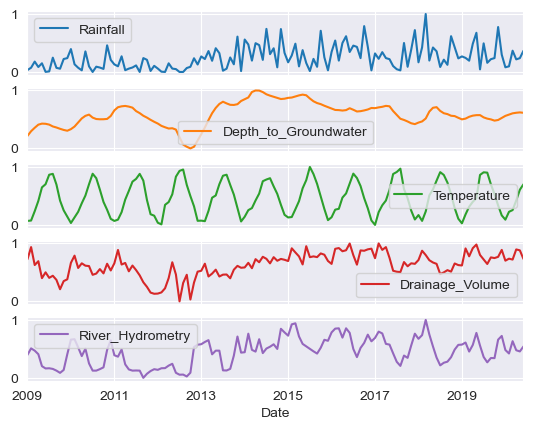

In [73]:
df.plot(subplots=True)

For the naive approach, the prediction for the next day should be the value of the current day.

In [74]:
naive_prediction = df.shift(1)
#naive_prediction.iloc[0,:] = df.iloc[0,:] # fill first day
#last_row = df.iloc[-1,:]
#last_row.name = datetime(2020,7,1)
#naive_prediction = naive_prediction.append(last_row)

In [75]:
naive_prediction=naive_prediction.iloc[-testSize:]

In [39]:
def plot_predictions(start=0, end=4200):
    fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 35))
    for series in range(0,5):
        naive_prediction.iloc[:,series].plot(ax = ax[series], legend=True, label=df.iloc[:,series].name+' Prediction')
        df.iloc[start:end,series].plot(ax = ax[series], legend=True, label=df.iloc[:,series].name+' Actual')
    plt.show()

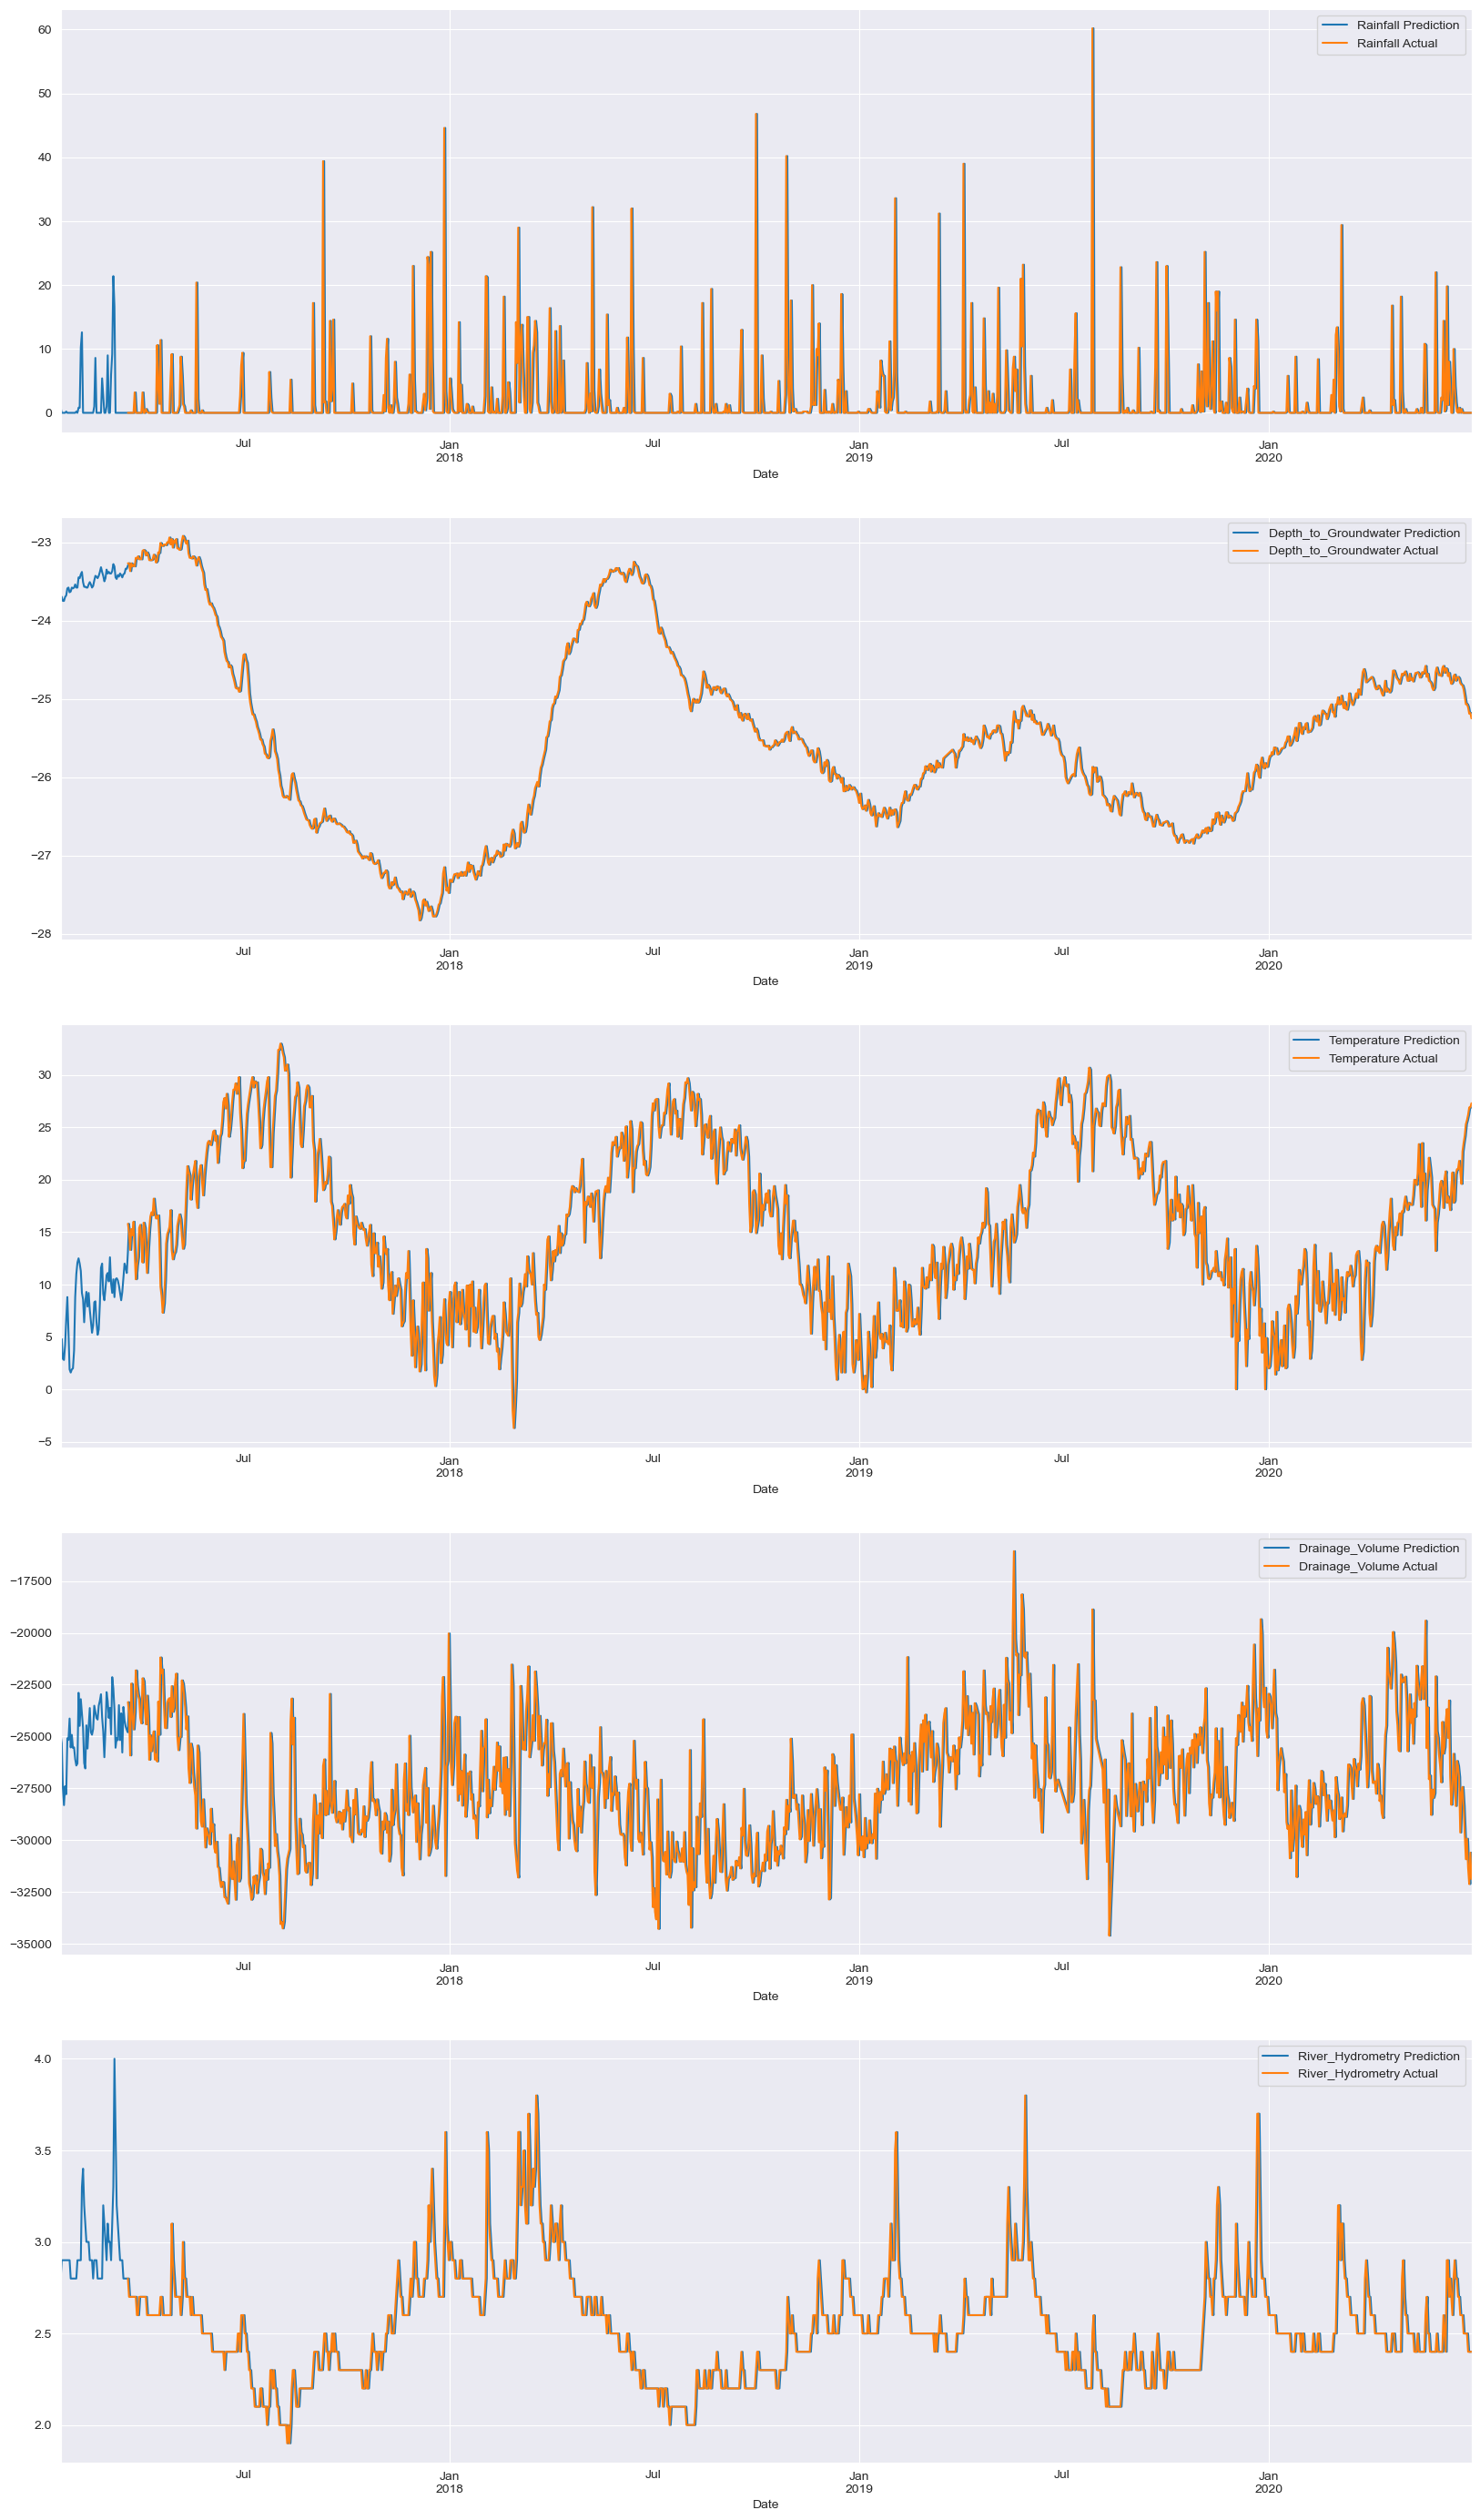

In [24]:
plot_predictions(3000)

In [76]:
naive_prediction.to_csv('predictions/naive/6.csv')

In [ ]:
saved_results = pd.read_csv('predictions/naive/yearly.csv', index_col=0)
saved_results.index = pd.to_datetime(saved_results.index, format = '%Y-%m-%d')
saved_results

In [77]:
saved_results = naive_prediction

In [78]:
metrics = {}
def calc_metrics(name):

    results = pd.DataFrame(data={'Predictions':saved_results[name], 'Actuals':df[name]}, index=saved_results.index)

    # Step 2: Calculate the differences between the predicted and actual values
    results['Difference'] = results['Actuals'] - results['Predictions']

    # Step 3: Calculate squared differences for RMSE
    results['Squared_difference'] = results['Difference'] ** 2

    # Step 4: Calculate absolute differences for MAE and MAPE
    results['Absolute_difference'] = np.abs(results['Difference'])
    results['Absolute_percentage_difference'] = np.abs(results['Difference'] / results['Actuals'])

    # Step 5: Compute the metrics
    rmse = np.sqrt(results['Squared_difference'].mean())
    mae = results['Absolute_difference'].mean()
    mape = results['Absolute_percentage_difference'].mean() * 100  # to get the percentage
    return rmse, mae, mape

for column in df.columns:

    rmse, mae, mape = calc_metrics(column)
    metrics[column] = {
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }
metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('metrics/naive/6.csv')